<a href="https://colab.research.google.com/github/bibinb4567/main/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 1: The Core Trio - NumPy, Matplotlib, and SymPy

## Aim
This session introduces the fundamental libraries that make Python a powerhouse for engineering.

## Objective
 To get comfortable creating arrays, plotting data, and performing symbolic calculations.

## Python basics-Recap

---



### Hello World
The classic first program for any language.


In [ ]:
print("Hello, B.Tech Robotics Students!")

Hello, B.Tech Robotics Students!


###  Variables and Data Types
Introduction to different data types like integers, floats, and strings.

In [ ]:
x = 10  # Integer
y = 3.5  # Float
name = "Python"  # String
is_student = True  # Boolean

print(x, y, name, is_student)

10 3.5 Python True


### Conditional Statements
Using if, elif, and else statements.

In [ ]:
x=10
if x>5:
  print("x is greater than 5")
elif x==5:
  print("x is equal to 5")
else:
  print("x is less than 5")

x is greater than 5


###  Loops/ Iteratives
Using for and while loops.

In [ ]:
# For loop
for i in range(5):
    print("Iteration:", i)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [ ]:
# While loop
n = 0
while n < 3:
    print("While loop iteration:", n)
    n += 1

While loop iteration: 0
While loop iteration: 1
While loop iteration: 2


###Functions

Defining and calling functions.

In [ ]:
def add_numbers(a, b):
    return a + b

result = add_numbers(5, 3)
print("Sum:", result)

Sum: 8


### Basic Numerical Computations using NumPy
NumPy is useful for numerical operations.

In [ ]:
#Solve 2x+3y=54x+4y=6
import numpy as np

A = np.array([[2, 3], [4, 4]])
b = np.array([5, 6])

x = np.linalg.solve(A, b)
print("Solution:", x)

Solution: [-0.5  2. ]


### Plotting Graphs with Matplotlib
Matplotlib is used for simple visualizations. Install using: pip install matplotlib

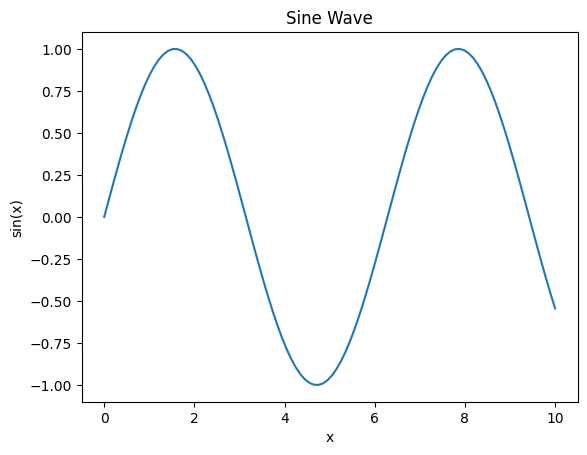

In [ ]:
#Plotting a sine wave
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Wave")
plt.show()

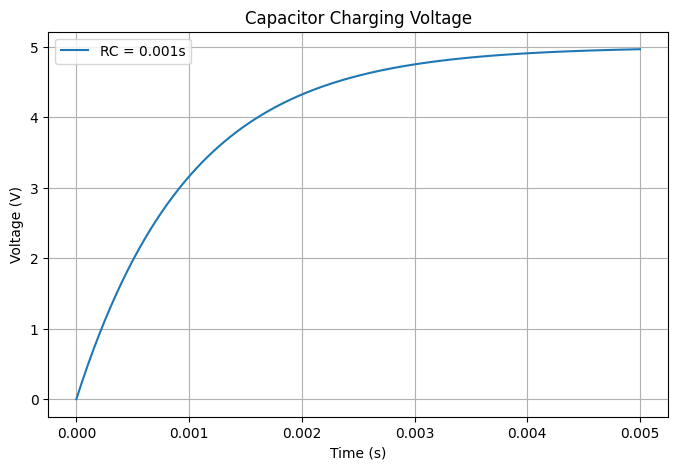

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Vs = 5.0  # Source voltage (Volts)
R = 1000  # Resistance (Ohms)
C = 1e-6  # Capacitance (Farads)
tau = R * C # Time constant

# Create a time vector from 0 to 5*tau
t = np.linspace(0, 5 * tau, 100)

# Calculate voltage using the formula
Vc = Vs * (1 - np.exp(-t / tau))

# Plotting the result
plt.figure(figsize=(8, 5))
plt.plot(t, Vc, label=f'RC = {tau}s')
plt.title('Capacitor Charging Voltage')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

###  Solution of PDE Using SciPy
SciPy provides numerical solvers for differential equations and optimizations.

In [ ]:
#Solving a Simple PDE ∂u/∂x + ∂u/∂t=0
from sympy import symbols, Function, Eq, Derivative, pdsolve

# Define variables
x, t = symbols('x t')
u = Function('u')(x, t)

# Define a simple PDE: ∂u/∂x + ∂u/∂t = 0
pde = Eq(Derivative(u, x) + Derivative(u, t), 0)

# Solve the PDE using pdsolve
solution = pdsolve(pde)
# Print the solution
print(solution)

Eq(u(x, t), F(-t + x))


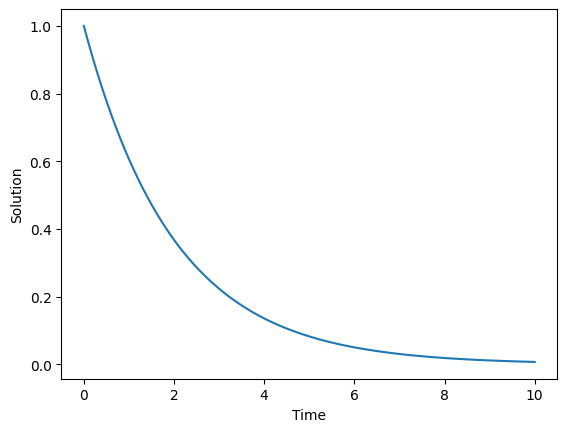

In [ ]:
# Example: Solving an ODE as an approximation for a PDE
from scipy.integrate import solve_ivp
import numpy as np
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def pde_rhs(t, u):
    return -0.5 * u  # Example equation

sol = solve_ivp(pde_rhs, [0, 10], [1], t_eval=np.linspace(0, 10, 100))
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Solution')
plt.show()

###Basic Optimization Using SymPy
SymPy is a symbolic mathematics library that can be used to derive analytical solutions to PDEs.

In [ ]:
from scipy.optimize import minimize

def objective(x):
    return x**2 + 2*x + 1

result = minimize(objective, 0)  # Start search at x=0
print("Optimal x:", result.x)

Optimal x: [-1.00000001]


# Practice tasks
## T-1: Representing an Analog Signal
**Concept:** In electronics, continuous analog signals (like AC voltage) are sampled at discrete time intervals to be processed by a digital system (like a microcontroller or computer). `A NumPy` array is the perfect way to store these sampled values.

**Python Skills:**  `np.linspace()`: To create an array of evenly spaced time points. `np.sin()`: An element-wise function that applies the sine function to every value in an array.

**Task:** Generate and plot a 50 Hz sine wave voltage signal with a peak voltage of 5V, sampled for 3 cycles.

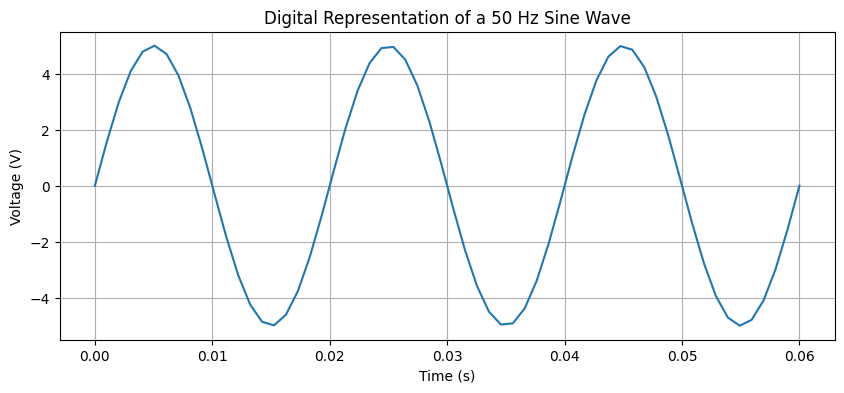

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
frequency = 50  # Hz
peak_voltage = 5.0  # Volts
cycles = 3
sampling_rate = 1000 # Samples per second

# --- Time Array Generation ---
# Duration of 3 cycles is 3 * (1/frequency)
duration = cycles / frequency
# Create 1000 points per second * duration
num_samples = int(sampling_rate * duration)
t = np.linspace(0, duration, num_samples)

# --- Signal Generation ---
# The formula for a sine wave is V(t) = V_peak * sin(2 * pi * f * t)
voltage = peak_voltage * np.sin(2 * np.pi * frequency * t)

# --- Visualization ---
plt.figure(figsize=(10, 4))
plt.plot(t, voltage)
plt.title('Digital Representation of a 50 Hz Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## T-2: Modeling a Noisy Sensor Reading
**Concept:** Real-world sensor data is never perfect. It’s often corrupted by random noise. We can simulate this by adding a random component to our ideal signal.

**Python Skills:** - Array Addition: Simply using + to add two arrays of the same shape.

- `np.random.normal()`: To generate Gaussian noise, which is a common model for electronic noise.

**Task:** Take the 5V sine wave from the previous example and add Gaussian noise with a standard deviation of 0.5V to simulate a noisy sensor reading.

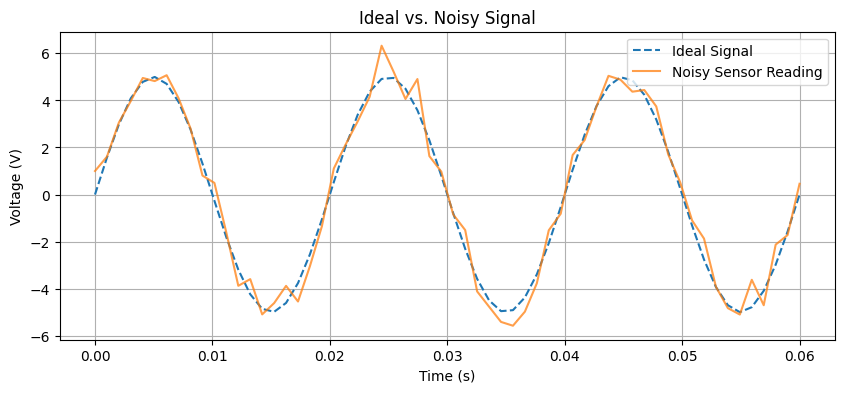

In [ ]:
# We can reuse the 't' and 'voltage' arrays from the previous example
noise_amplitude = 0.5 # Standard deviation of the noise in Volts

# Generate noise with the same shape as our voltage array
noise = np.random.normal(0, noise_amplitude, voltage.shape)

# Create the noisy signal by adding the noise to the ideal signal
noisy_voltage = voltage + noise

# --- Visualization ---
plt.figure(figsize=(10, 4))
plt.plot(t, voltage, label='Ideal Signal', linestyle='--')
plt.plot(t, noisy_voltage, label='Noisy Sensor Reading', alpha=0.75)
plt.title('Ideal vs. Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()

## T-3: Forward Kinematics of a 2-Link Robot Arm
**Concept:** Forward kinematics in robotics is the process of calculating the position of the robot’s end-effector (e.g., its gripper) based on its joint angles. For a simple 2D arm, this involves basic trigonometry.

**Python Skills:**

- Using arrays to represent vectors (link lengths).
- Using scalar variables for parameters (joint angles).
- Basic arithmetic and trigonometric functions `(np.cos, np.sin, np.deg2rad)`.

**Task:** Calculate and plot the position of a 2-link planar robot arm with link lengths L1=1.0m and L2=0.7m for given joint angles theta1=30° and theta2=45°.

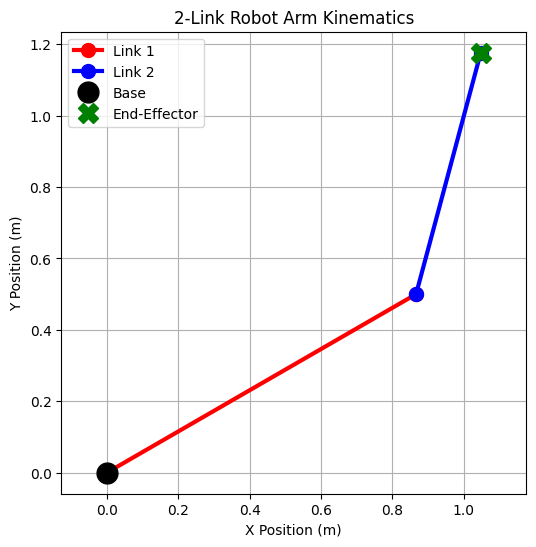

End-effector is at position: (1.05, 1.18)


In [ ]:
# --- Parameters ---
L1 = 1.0  # Length of link 1
L2 = 0.7  # Length of link 2
theta1_deg = 30
theta2_deg = 45

# Convert angles to radians for numpy's trig functions
theta1 = np.deg2rad(theta1_deg)
theta2 = np.deg2rad(theta2_deg)

# --- Kinematics Calculations ---
# Position of the first joint (end of L1)
x1 = L1 * np.cos(theta1)
y1 = L1 * np.sin(theta1)

# Position of the end-effector (end of L2) relative to the first joint
# The angle of the second link is theta1 + theta2
x2 = x1 + L2 * np.cos(theta1 + theta2)
y2 = y1 + L2 * np.sin(theta1 + theta2)

# --- Visualization ---
plt.figure(figsize=(6, 6))
# Plot the arm links
plt.plot([0, x1], [0, y1], 'r-o', linewidth=3, markersize=10, label='Link 1')
plt.plot([x1, x2], [y1, y2], 'b-o', linewidth=3, markersize=10, label='Link 2')

# Plot the base and end-effector positions for clarity
plt.plot(0, 0, 'ko', markersize=15, label='Base')
plt.plot(x2, y2, 'gX', markersize=15, label='End-Effector')

plt.title('2-Link Robot Arm Kinematics')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid(True)
plt.axis('equal') # Important for correct aspect ratio
plt.legend()
plt.show()

print(f"End-effector is at position: ({x2:.2f}, {y2:.2f})")

## T-4: Rotating a Sensor’s Coordinate Frame
**Concept:** A robot often has sensors (like a camera or a Lidar) mounted at an angle. To understand the sensor data in the robot’s own coordinate frame, we need to rotate the data points. This is a fundamental operation in robotics and computer vision, done using a rotation matrix.

**Python Skills:**

- Creating a 2D NumPy array (a matrix).

- Matrix multiplication using the `@`operator.

- Transposing an array `(.T)` for correct multiplication dimensions.

**Task:** A sensor detects an object at coordinates (2, 0) in its own frame. The sensor is rotated 45 degrees counter-clockwise relative to the robot’s base. Find the object’s coordinates in the robot’s frame.

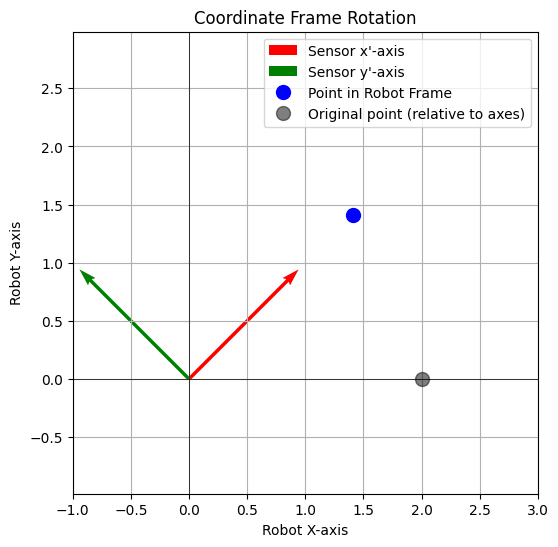

Rotation Matrix:
 [[ 0.71 -0.71]
 [ 0.71  0.71]]

Point in Sensor Frame: [2 0]
Point in Robot Frame:  [1.41 1.41]


In [ ]:
# Angle of the sensor relative to the robot
angle_deg = 45
angle_rad = np.deg2rad(angle_deg)

# Point detected in the sensor's frame [x, y]
p_sensor = np.array([[2], [0]]) # As a column vector

# 2D Rotation Matrix
# R = [[cos(theta), -sin(theta)],
#      [sin(theta),  cos(theta)]]
R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
              [np.sin(angle_rad),  np.cos(angle_rad)]])

# The transformation: p_robot = R @ p_sensor
p_robot = R @ p_sensor

# --- Visualization ---
plt.figure(figsize=(6, 6))
# Plot sensor's axes
plt.quiver(0, 0, np.cos(angle_rad), np.sin(angle_rad), color='r', scale=3, label="Sensor x'-axis")
plt.quiver(0, 0, -np.sin(angle_rad), np.cos(angle_rad), color='g', scale=3, label="Sensor y'-axis")

# Plot the point in the robot's frame
plt.plot(p_robot[0], p_robot[1], 'bo', markersize=10, label='Point in Robot Frame')
# For context, let's show where the point was in the sensor's frame (if it weren't rotated)
# This is just for visualization
plt.plot(p_sensor[0], p_sensor[1], 'ko', markersize=10, alpha=0.5, label='Original point (relative to axes)')


plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.axis('equal')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.title("Coordinate Frame Rotation")
plt.xlabel("Robot X-axis")
plt.ylabel("Robot Y-axis")
plt.legend()
plt.show()

print("Rotation Matrix:\n", np.round(R, 2))
print(f"\nPoint in Sensor Frame: {p_sensor.flatten()}")
print(f"Point in Robot Frame:  {np.round(p_robot.flatten(), 2)}")

## T-5: Applying a Simple Digital Filter
**Concept:** To clean up the noisy signal from Example 3, we can apply a digital filter. The simplest is a moving average filter, which replaces each data point with the average of itself and its neighbors. This smooths out sharp fluctuations (noise).

**Python Skills:**

- Looping over an array.
- Array slicing: array[start:end].
- `np.mean()`: To calculate the average of a set of numbers.

**Task:** Apply a 5-point moving average filter to the noisy_voltage signal created in Example 3 and plot the result to see the smoothing effect.

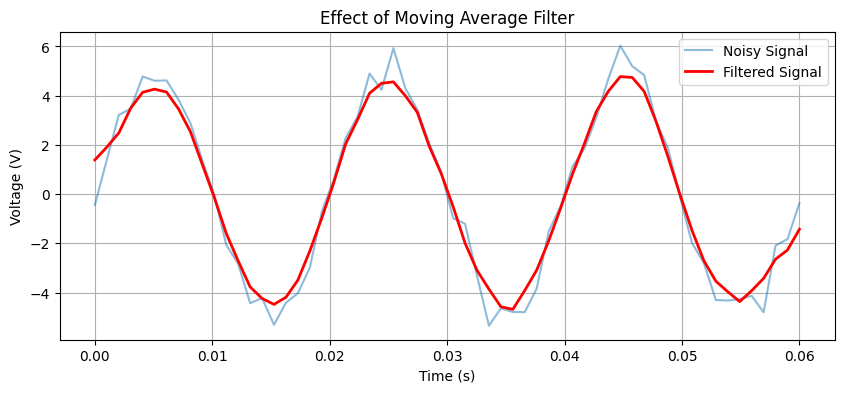

In [ ]:
# Let's regenerate the noisy signal for a self-contained example
# (In a real notebook, you would reuse the variable from before)
frequency = 50
peak_voltage = 5.0
duration = 3 / frequency
t = np.linspace(0, duration, int(1000 * duration))
voltage = peak_voltage * np.sin(2 * np.pi * frequency * t)
noise = np.random.normal(0, 0.5, voltage.shape)
noisy_voltage = voltage + noise

# --- Filtering ---
window_size = 5
# Create an empty array to store the filtered signal
filtered_voltage = np.zeros_like(noisy_voltage)

# Loop through the signal. We can't compute a full window at the very edges,
# so we'll just copy the original values for the first and last few points.
for i in range(len(noisy_voltage)):
    # Find the start and end of the slice
    start = max(0, i - window_size // 2)
    end = min(len(noisy_voltage), i + window_size // 2 + 1)

    # Get the window of data and calculate its mean
    window = noisy_voltage[start:end]
    filtered_voltage[i] = np.mean(window)

# --- Visualization ---
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_voltage, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_voltage, label='Filtered Signal', color='r', linewidth=2)
plt.title('Effect of Moving Average Filter')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()